In [44]:
import os
os.chdir('/Users/varshapandey/Python Directory')
os.getcwd()

'/Users/varshapandey/Python Directory'

In [432]:
import numpy as np
import pandas as pd

df = pd.read_csv('Training.csv')

In [433]:
df.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,30/07/17,27/07/17,01/02/18,4467,06/02/18,6
1,2851218,AN,7,500004,233,233,131,A,ADLD,500001,27/04/17,02/12/16,08/02/18,4403,13/02/18,5
2,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,06/03/17,05/03/17,04/02/18,4444,08/02/18,12
3,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,01/02/18,27/01/18,03/02/18,4388,12/02/18,9
4,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,17/07/17,25/01/17,01/02/18,4388,08/02/18,13


In [434]:
df['srno'].unique().shape

(8165,)

In [435]:
df.shape

(8275, 16)

In [436]:
## dropping overall duplicates in the data
df[df.duplicated(keep=False)]
df.drop_duplicates(inplace = True)

In [437]:
df.shape

(8264, 16)

In [438]:
## 'srno' is a serial identifier and shall be removed from the analysis
pd.concat(g for _, g in df.groupby("srno") if len(g) > 1).head()
df.drop('srno',axis=1,inplace=True)
df.shape

(8264, 15)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 0 to 8274
Data columns (total 15 columns):
mobmake                8264 non-null object
hubid                  8264 non-null int64
hubpincode             8264 non-null int64
pickuppartnerid        8264 non-null int64
deliverypartnerid      8264 non-null int64
insuranceCompanyId     8264 non-null int64
custpincodecategory    8264 non-null object
claimtype              8264 non-null object
custpincode            8264 non-null int64
memcreateddate         8264 non-null object
mobilepurchasedate     8264 non-null object
claimintdate           8264 non-null object
servicecntrid          8264 non-null int64
pickupStartdate        8264 non-null object
tat_in_days            8264 non-null int64
dtypes: int64(8), object(7)
memory usage: 1.0+ MB


In [440]:
#custpincode has too many categorical value and shall be dropped
df.drop('custpincode',axis=1,inplace=True)

In [441]:
for col in ['mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','servicecntrid']:
    df[col] = df[col].astype('object')

In [442]:
df['memcreateddate'] = pd.to_datetime(df['memcreateddate'],format='%d/%m/%y')
df['mobilepurchasedate'] = pd.to_datetime(df['mobilepurchasedate'],format='%d/%m/%y')
df['claimintdate'] = pd.to_datetime(df['claimintdate'],format='%d/%m/%y')
df['pickupStartdate'] = pd.to_datetime(df['pickupStartdate'],format='%d/%m/%y')

In [443]:
from sklearn import preprocessing
for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [444]:
df.apply(lambda x: len(x.unique()))

mobmake                 41
hubid                   21
hubpincode              21
pickuppartnerid          4
deliverypartnerid        4
insuranceCompanyId       2
custpincodecategory      5
claimtype                2
memcreateddate         671
mobilepurchasedate     813
claimintdate            81
servicecntrid          145
pickupStartdate         83
tat_in_days             46
dtype: int64

In [445]:
df.dtypes

mobmake                         int64
hubid                           int64
hubpincode                      int64
pickuppartnerid                 int64
deliverypartnerid               int64
insuranceCompanyId              int64
custpincodecategory             int64
claimtype                       int64
memcreateddate         datetime64[ns]
mobilepurchasedate     datetime64[ns]
claimintdate           datetime64[ns]
servicecntrid                   int64
pickupStartdate        datetime64[ns]
tat_in_days                     int64
dtype: object

In [446]:
df['mem_claim_days'] = (df['claimintdate'] - df['memcreateddate']).dt.days
df['purchase_claim_days'] = (df['claimintdate'] - df['mobilepurchasedate']).dt.days
df['claim_pickup_days'] = (df['pickupStartdate'] - df['claimintdate']).dt.days

df.dtypes

mobmake                         int64
hubid                           int64
hubpincode                      int64
pickuppartnerid                 int64
deliverypartnerid               int64
insuranceCompanyId              int64
custpincodecategory             int64
claimtype                       int64
memcreateddate         datetime64[ns]
mobilepurchasedate     datetime64[ns]
claimintdate           datetime64[ns]
servicecntrid                   int64
pickupStartdate        datetime64[ns]
tat_in_days                     int64
mem_claim_days                  int64
purchase_claim_days             int64
claim_pickup_days               int64
dtype: object

In [447]:
df.head()

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,mem_claim_days,purchase_claim_days,claim_pickup_days
0,14,3,14,2,2,0,1,0,2017-07-30,2017-07-27,2018-02-01,92,2018-02-06,6,186,189,5
1,14,7,13,2,2,0,1,0,2017-04-27,2016-12-02,2018-02-08,53,2018-02-13,5,287,433,5
2,10,10,6,2,2,0,1,0,2017-03-06,2017-03-05,2018-02-04,79,2018-02-08,12,335,336,4
3,10,2,2,2,2,1,1,0,2018-02-01,2018-01-27,2018-02-03,42,2018-02-12,9,2,7,9
4,10,2,2,2,2,1,1,0,2017-07-17,2017-01-25,2018-02-01,42,2018-02-08,13,199,372,7


In [448]:
y = df['tat_in_days']
df.drop(['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate','tat_in_days'],axis=1,inplace=True)

In [449]:
df.columns.tolist()

['mobmake',
 'hubid',
 'hubpincode',
 'pickuppartnerid',
 'deliverypartnerid',
 'insuranceCompanyId',
 'custpincodecategory',
 'claimtype',
 'servicecntrid',
 'mem_claim_days',
 'purchase_claim_days',
 'claim_pickup_days']

In [450]:
df.dtypes

mobmake                int64
hubid                  int64
hubpincode             int64
pickuppartnerid        int64
deliverypartnerid      int64
insuranceCompanyId     int64
custpincodecategory    int64
claimtype              int64
servicecntrid          int64
mem_claim_days         int64
purchase_claim_days    int64
claim_pickup_days      int64
dtype: object

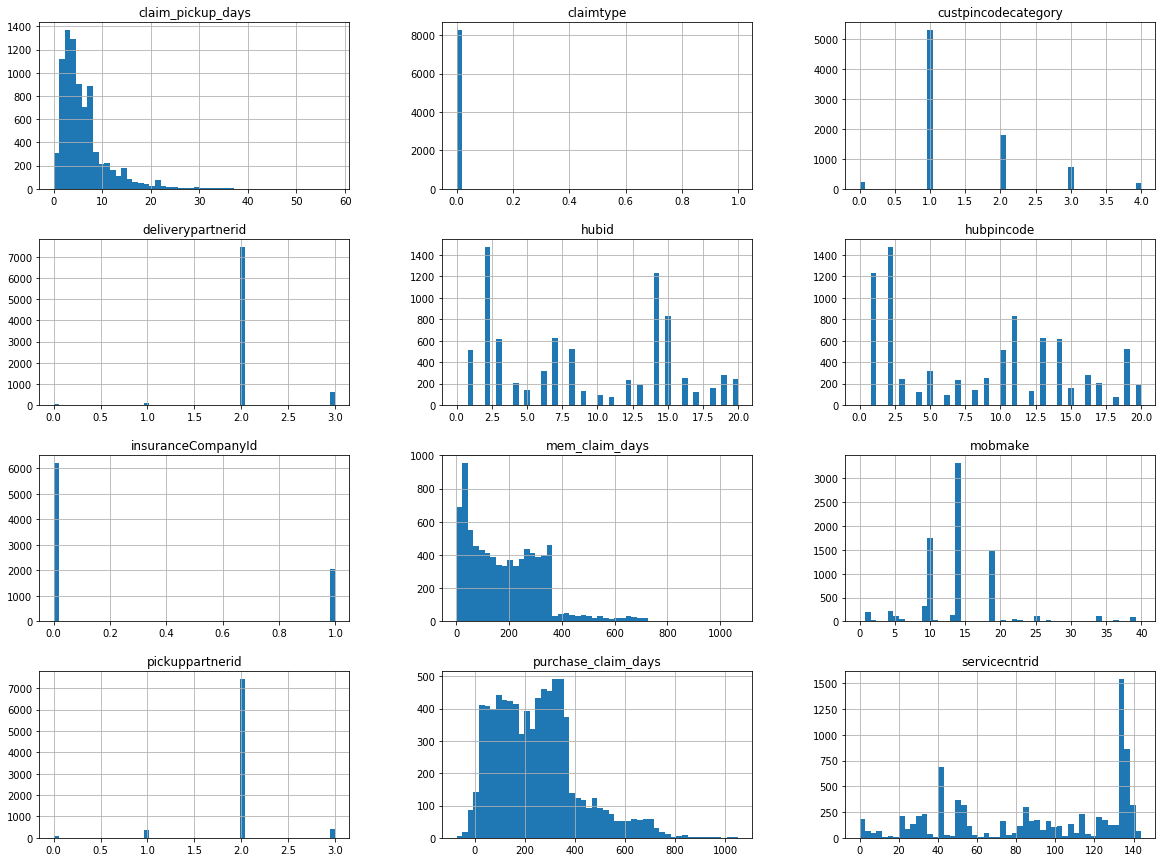

In [451]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [452]:
df['servicecntrcount'] = df.groupby('servicecntrid')['servicecntrid'].transform('count')
df['servicecntrGroup'] = np.where(df['servicecntrcount']<=30, 0, df.servicecntrid)

In [453]:
#df.groupby(['servicecntrGroup','servicecntrid']).count()
len(df.servicecntrGroup.value_counts())
#df[df['servicecntrGroup']=='Others']

49

In [454]:
df.drop(['servicecntrcount','servicecntrid'],axis=1,inplace=True)

In [455]:
df.shape

(8264, 12)

In [456]:
corr = df.corr()
corr

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,mem_claim_days,purchase_claim_days,claim_pickup_days,servicecntrGroup
mobmake,1.000000,-0.154419,-0.051154,-0.003857,-0.008519,-0.074947,0.002400,0.022731,0.018377,0.010025,0.022816,0.086756
hubid,-0.154419,1.000000,0.036594,-0.004441,-0.012076,-0.147345,0.078019,0.002699,0.103156,0.004283,-0.010669,0.423199
hubpincode,-0.051154,0.036594,1.000000,-0.065092,-0.025397,-0.087666,0.083500,0.008296,0.034384,-0.026439,-0.026935,0.073352
pickuppartnerid,-0.003857,-0.004441,-0.065092,1.000000,0.225590,0.085226,-0.129722,-0.010465,0.007710,0.034024,0.002350,0.004189
deliverypartnerid,-0.008519,-0.012076,-0.025397,0.225590,1.000000,-0.017806,-0.037493,-0.028627,0.051875,0.034781,0.007723,0.020543
insuranceCompanyId,-0.074947,-0.147345,-0.087666,0.085226,-0.017806,1.000000,-0.091279,0.050676,-0.332845,0.021392,-0.045614,-0.209590
custpincodecategory,0.002400,0.078019,0.083500,-0.129722,-0.037493,-0.091279,1.000000,-0.005567,-0.057143,-0.071657,0.018262,0.090630
claimtype,0.022731,0.002699,0.008296,-0.010465,-0.028627,0.050676,-0.005567,1.000000,0.045906,0.034821,-0.000800,0.009209
mem_claim_days,0.018377,0.103156,0.034384,0.007710,0.051875,-0.332845,-0.057143,0.045906,1.000000,0.628269,0.004577,0.139683
purchase_claim_days,0.010025,0.004283,-0.026439,0.034024,0.034781,0.021392,-0.071657,0.034821,0.628269,1.000000,0.006408,0.020716


In [457]:
for col in ['mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','servicecntrGroup']:
    df[col] = df[col].astype('category')
df = pd.get_dummies(df,drop_first=True)

In [458]:
X = df
X.dtypes
X.shape

(8264, 143)

In [459]:
y.shape

(8264,)

In [460]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [32]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}

In [463]:
regr = RandomForestRegressor(bootstrap=True,max_depth=20,max_features='sqrt',min_samples_leaf=2,min_samples_split= 10,n_estimators=600,oob_score=True)
regr.fit(X_train, y_train)

regr_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = regr.predict(X_test)
y_predict_dummy_mean = regr_dummy_mean.predict(X_test)

print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (RF) : {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (RF): {:.2f}".format(r2_score(y_test, y_predict)))
print("OOB Score: {:.2f}".format(regr.oob_score_))

print('Parameters:', regr.get_params())

Mean squared error (dummy): 26.76
Mean squared error (RF) : 20.61
r2_score (dummy): -0.00
r2_score (RF): 0.23
OOB Score: 0.25
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 600, 'n_jobs': 1, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


Linear model, coefficients:  [ 9.58015723e-04  4.35039954e-04  2.50171385e-02  2.64463227e+00
  5.47592043e+00 -3.88461485e-12  2.70535279e+00  1.73367503e+00
 -1.23600699e-01  2.89087791e+00  1.43631379e+00  2.97354067e+00
  1.97099244e+00  7.37818459e+00  1.29986377e+01  3.23789270e+00
  1.30975857e+00 -4.54697631e-03  1.40976458e+00  2.10820192e+01
  1.15573703e+01  3.32599514e+00  9.81956404e+00  6.98799774e+00
  5.77234851e+00  8.41646159e+00  1.31127943e+01  5.88507495e+00
  8.88018995e+00  5.42754507e+00  2.45360305e+01  2.60374853e+00
  1.35071403e+01  8.57944969e+00  1.62088076e+01  2.28465986e+00
  4.54964051e+00  6.36386507e+00  4.52146941e+00  4.40744433e+00
  1.12592996e+01  2.08606147e+00  4.70427350e+00  5.41492473e+00
  5.01426163e+00  4.02829542e+00  4.06469056e+00  3.86870563e+00
  4.35001562e+00  2.56699846e+00  5.62341320e+00  4.74722546e+00
  5.32836605e+00  3.88638799e+00  5.46132446e+00  5.76258605e+00
  5.10666551e+00  3.36392352e+00  4.41376643e+00  5.24782841e

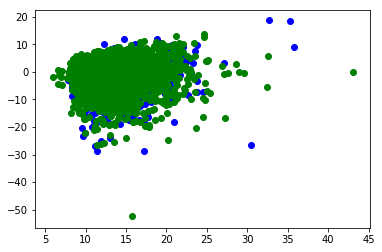

In [464]:
from sklearn import linear_model
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

lm = linear_model.LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))
plt.scatter(y_predict,y_predict-y_test,c='b')
plt.scatter(lm.predict(X_train),lm.predict(X_train)-y_train,c='g')

In [487]:
df2 = pd.read_csv('Test.csv',index_col = 'srno')
print(df2.shape)
df2.drop_duplicates(inplace = True)
print(df2.shape)
df2.head()

(2099, 14)
(2099, 14)


,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
srno,,,,,,,,,,,,,,
2840600,C,6,160059,233,233,131,B,ADLD,134109,01/04/17,01/04/17,05/02/18,4549,12/02/18
2839018,AN,22,400104,233,233,131,B,ADLD,431001,17/01/18,23/11/17,04/02/18,4581,28/02/18
2957610,AN,21,110015,233,233,131,A,ADLD,122003,10/07/17,07/06/17,08/03/18,4580,12/03/18
2955362,AJ,6,160059,233,233,228,B,ADLD,140604,04/02/18,09/08/17,08/03/18,4437,11/03/18
2971077,AJ,2,110018,308,233,228,A,ADLD,122009,18/07/17,25/05/17,12/03/18,4388,15/03/18


In [489]:
#df2.drop('srno',axis=1,inplace=True)
df2.drop('custpincode',axis=1,inplace=True)

In [490]:
for col in ['mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','servicecntrid']:
    df2[col] = df2[col].astype('object')

In [491]:
df2['memcreateddate'] = pd.to_datetime(df2['memcreateddate'],format='%d/%m/%y')
df2['mobilepurchasedate'] = pd.to_datetime(df2['mobilepurchasedate'],format='%d/%m/%y')
df2['claimintdate'] = pd.to_datetime(df2['claimintdate'],format='%d/%m/%y')
df2['pickupStartdate'] = pd.to_datetime(df2['pickupStartdate'],format='%d/%m/%y')

In [492]:
from sklearn import preprocessing
for column in df2.columns:
    if df2[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df2[column] = le.fit_transform(df2[column])

In [493]:
df2['servicecntrcount'] = df2.groupby('servicecntrid')['servicecntrid'].transform('count')
df2['servicecntrGroup'] = np.where(df2['servicecntrcount']<=30, 0, df2.servicecntrid)
df2.drop(['servicecntrcount','servicecntrid'],axis=1,inplace=True)

In [494]:
df2.shape

(2099, 13)

In [495]:
df2['mem_claim_days'] = (df2['claimintdate'] - df2['memcreateddate']).dt.days
df2['purchase_claim_days'] = (df2['claimintdate'] - df2['mobilepurchasedate']).dt.days
df2['claim_pickup_days'] = (df2['pickupStartdate'] - df2['claimintdate']).dt.days

In [496]:
df2.drop(['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'],axis=1,inplace=True)

In [497]:
df2.shape

(2099, 12)

In [498]:
for col in ['mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','servicecntrGroup']:
    df2[col] = df2[col].astype('category')
df2 = pd.get_dummies(df2,drop_first=True)

In [499]:
df2.head()
df2.shape

(2099, 106)

In [500]:
X.apply(lambda x: len(x.unique()))

mem_claim_days          485
purchase_claim_days     634
claim_pickup_days        39
mobmake_1                 2
mobmake_2                 2
mobmake_3                 2
mobmake_4                 2
mobmake_5                 2
mobmake_6                 2
mobmake_7                 2
mobmake_8                 2
mobmake_9                 2
mobmake_10                2
mobmake_11                2
mobmake_12                2
mobmake_13                2
mobmake_14                2
mobmake_15                2
mobmake_16                2
mobmake_17                2
mobmake_18                2
mobmake_19                2
mobmake_20                2
mobmake_21                2
mobmake_22                2
mobmake_23                2
mobmake_24                2
mobmake_25                2
mobmake_26                2
mobmake_27                2
                       ... 
servicecntrGroup_73       2
servicecntrGroup_79       1
servicecntrGroup_82       1
servicecntrGroup_86       1
servicecntrGroup_87 

In [501]:
df2.apply(lambda x: len(x.unique()))

mem_claim_days           485
purchase_claim_days      634
claim_pickup_days         39
mobmake_1                  2
mobmake_2                  2
mobmake_3                  2
mobmake_4                  2
mobmake_5                  2
mobmake_6                  2
mobmake_7                  2
mobmake_8                  2
mobmake_9                  2
mobmake_10                 2
mobmake_11                 2
mobmake_12                 2
mobmake_13                 2
mobmake_14                 2
mobmake_15                 2
mobmake_16                 2
mobmake_17                 2
mobmake_18                 2
mobmake_19                 2
mobmake_20                 2
mobmake_21                 2
mobmake_22                 2
mobmake_23                 2
mobmake_24                 2
mobmake_25                 2
mobmake_26                 2
mobmake_27                 2
                        ... 
pickuppartnerid_1          2
pickuppartnerid_2          2
pickuppartnerid_3          2
deliverypartne

In [502]:
missing_cols = set( X.columns ) - set( df2.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df2[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df2 = df2[X.columns]

In [503]:
print(X.shape)
print(df2.shape)

(2099, 143)
(2099, 143)


In [515]:
X = df2
y_predict = pd.DataFrame(regr.predict(df2),index=df2.index,columns=['Predicted_Values'])

In [516]:
y_predict.head()

,Predicted_Values
srno,
2840600,13.806042
2839018,16.884070
2957610,14.541372
2955362,13.653044
2971077,13.224646


In [519]:
y_predict.to_csv('Final_Predictions.csv')